In [1]:
import numpy as np
class KNNClassification:
    def __init__(self,n_neighbours=3) -> None:
        self.n_neighbours=n_neighbours
        
    def fit(self,X,y):
        self.X=X
        self.y=y
        
    def predict(self,X_test):
        predictions=[]
        for x in X_test:
            distances=[]
            for i,x_train in enumerate(self.X):
                dist=np.sqrt(np.sum((x-x_train)**2))
                distances.append((i,dist))
            distances.sort(key=lambda x: x[1])
            k_nearest=[self.y[i] for i, _ in distances[:self.n_neighbours]]
            
            prediction=max(set(k_nearest), key=k_nearest.count)
            predictions.append(prediction)
        return predictions        
         

In [3]:
import pandas as pd
df = pd.read_csv('diabetes1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [4]:
df.dropna()
df= df[np.isfinite(df).all(1)]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
6,3.0,78,50.0,32.0,88.0,31.0,0.248,26.0,1.0


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,21,28,0,123,344,29,1
1,1,23,18,22,0,62,195,10,0
2,8,121,16,0,0,30,362,11,1
3,1,27,18,16,61,77,53,0,0
6,3,16,7,25,56,103,117,5,1


In [18]:
X = df.iloc[:,[0,1,2,3,4,5,6,7]].values
y = df.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
knn=KNNClassification()
knn.fit(X_train,y_train)

In [24]:
y_pred=knn.predict(X_test)
# y_pred

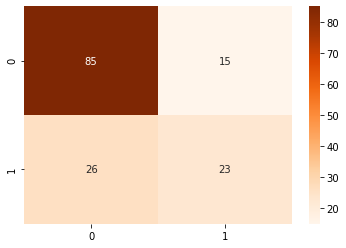

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Oranges')